In [1]:
import pandas as pd # data processing, CSV file
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Load data
data = pd.read_csv("/content/marketing_data.csv")

In [2]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [3]:
#Check first few rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
# Check descriptive statistics
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check null Values in the Data
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
#Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. we may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.
# Remove non-numeric characters from 'Income' column and convert to numeric
data.Income = data.Income.str.replace('$', '').str.replace(',', '')
data.Income = pd.to_numeric(data.Income)

# Perform missing value imputation for 'Income'
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [7]:
# Check null Values again in the Data
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [8]:
data.Marital_Status.replace(['YOLO', 'Absurd'], 'Other', inplace=True)
data.Marital_Status.replace('Alone', 'Married', inplace=True)

In [9]:
#missing_ values
# Replace missing values with the mean
mean_income = data['Income'].mean()
data['Income'].fillna(mean_income, inplace=True)


In [10]:
data.duplicated().sum()


0

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52248.748825,25039.981052,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [12]:
 #Exploratory Data Analysis
 #Distributions
 def dist(col, bins='auto'):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, bins=bins, color='darkblue', kde=True)
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequnecy", fontsize=10)
    plt.show()

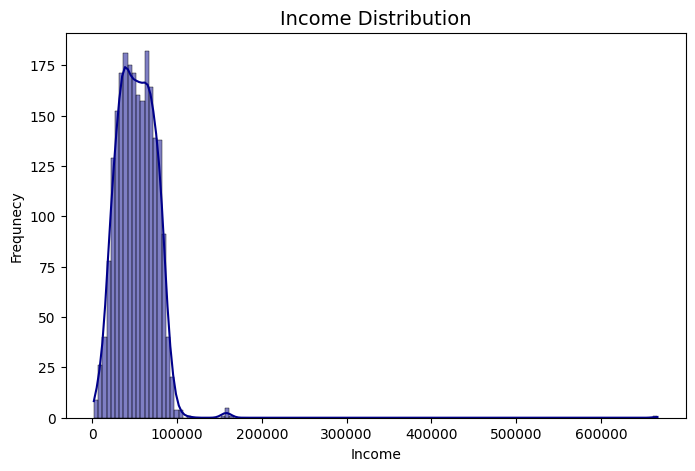

In [13]:
dist('Income')

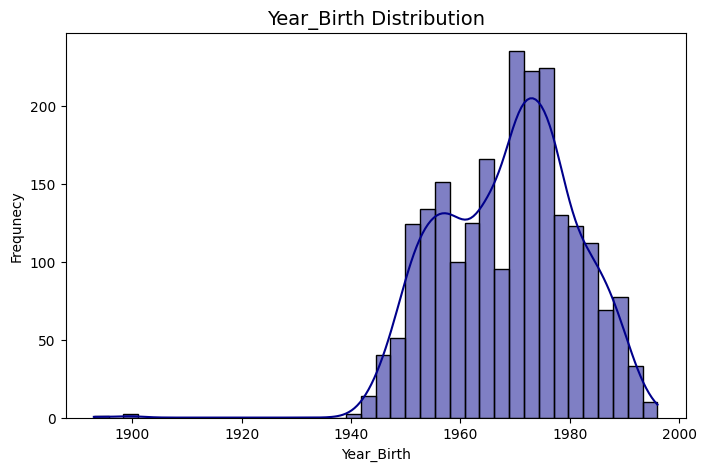

In [14]:
dist('Year_Birth')

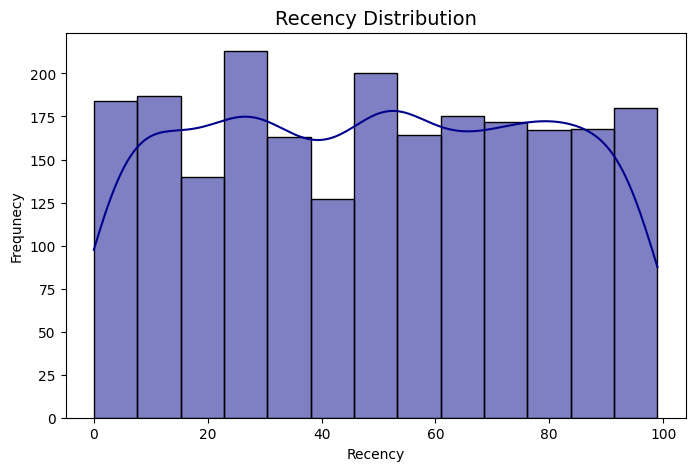

In [15]:
dist('Recency')

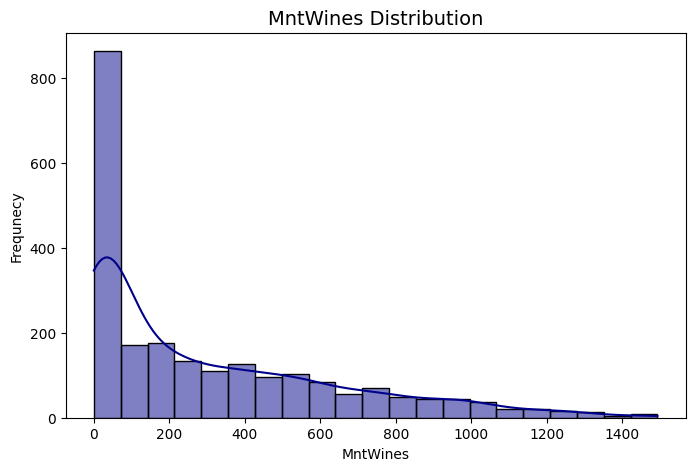

In [16]:
dist('MntWines')

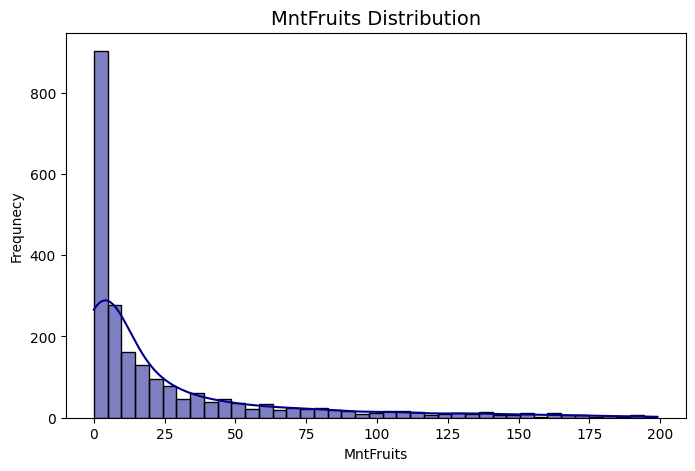

In [17]:
dist('MntFruits')

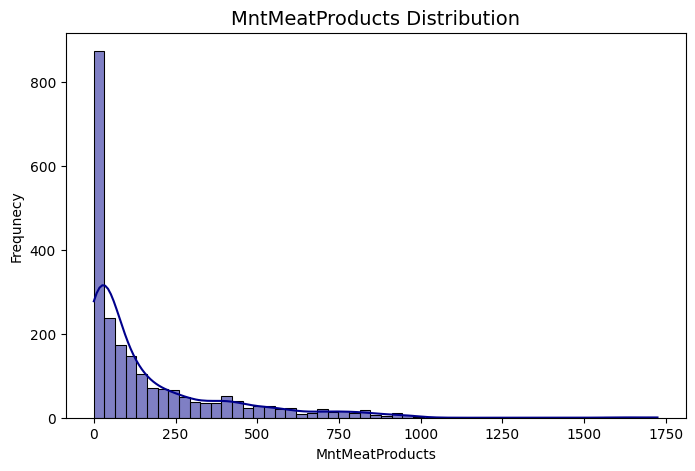

In [18]:
dist('MntMeatProducts')

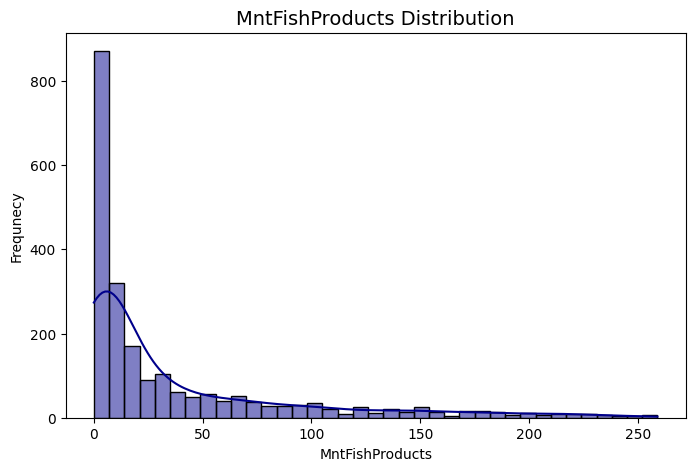

In [19]:
dist('MntFishProducts')

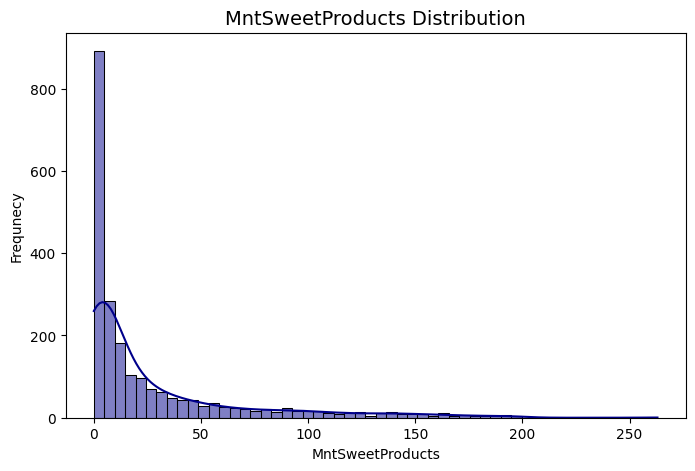

In [20]:
dist('MntSweetProducts')

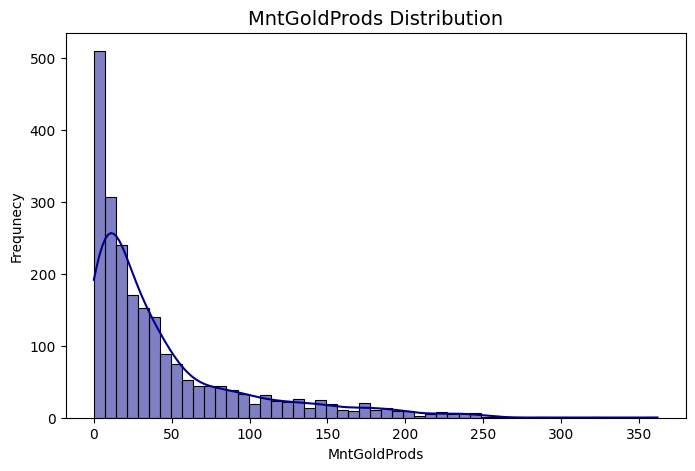

In [21]:
dist('MntGoldProds')

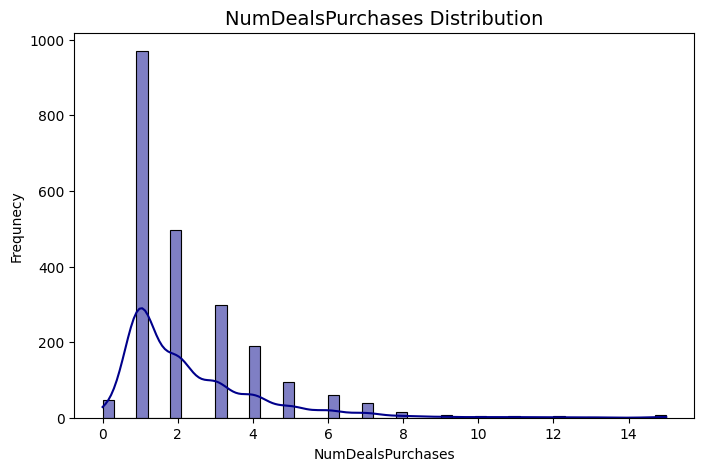

In [22]:
dist('NumDealsPurchases')

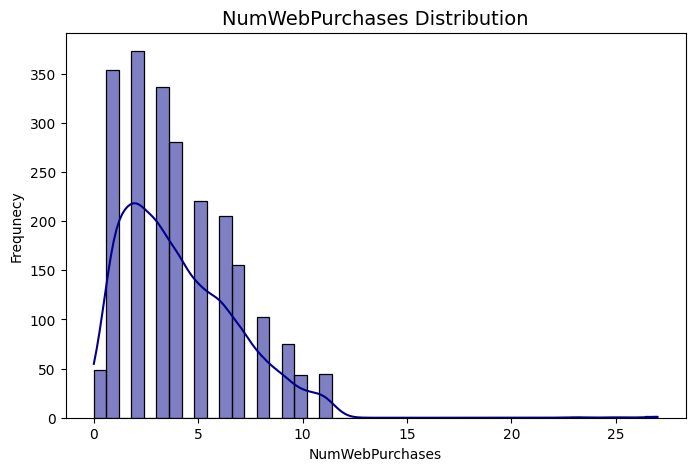

In [23]:
dist('NumWebPurchases')

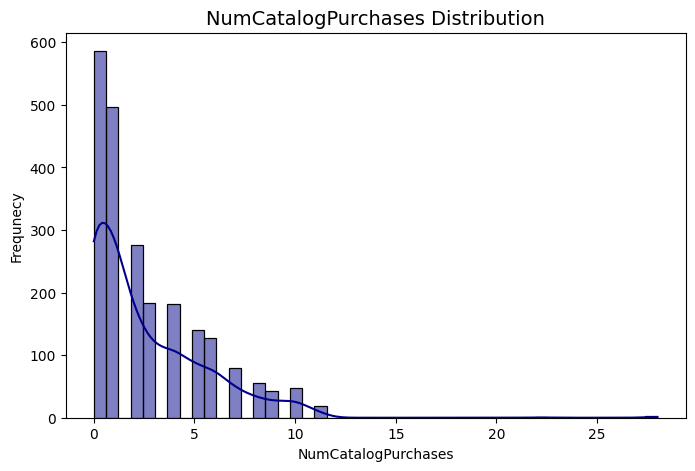

In [24]:
dist('NumCatalogPurchases')

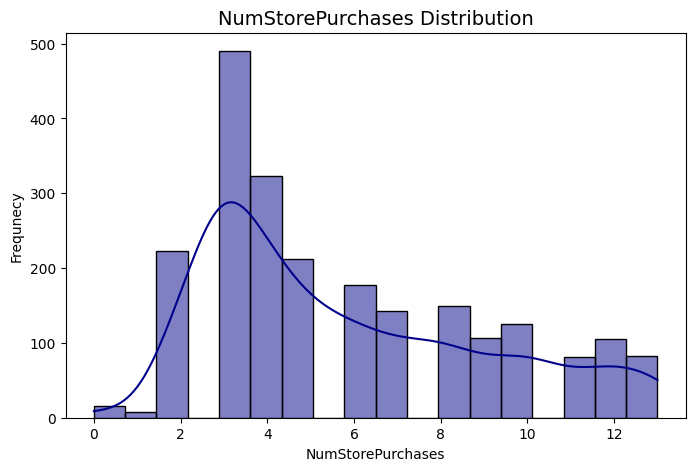

In [25]:
dist('NumStorePurchases')

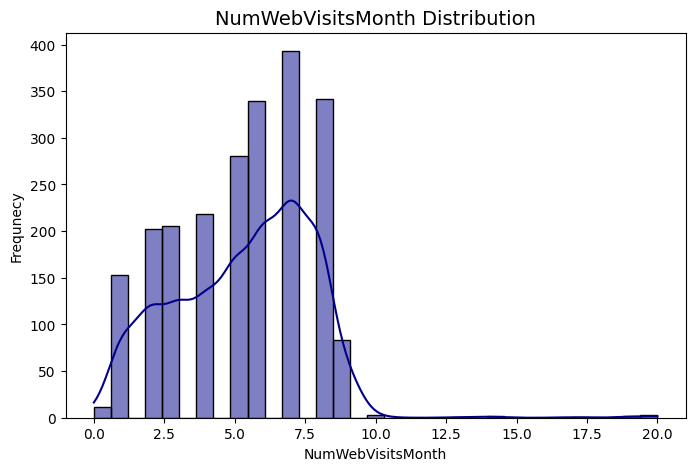

In [26]:
dist('NumWebVisitsMonth')

In [27]:
#Barplot for Categorical Variables
def countplot(col):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, palette='dark')
    plt.title(f"{col} Countplot", fontsize=14)
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequnecy", fontsize=10)
    plt.show()

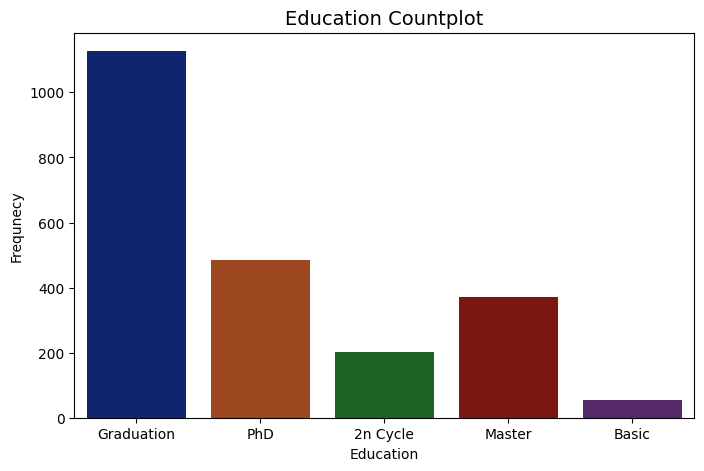

In [28]:
countplot("Education")

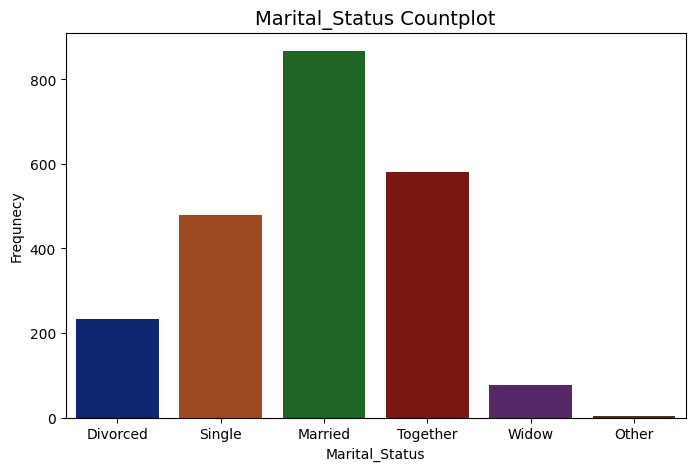

In [29]:
countplot('Marital_Status')

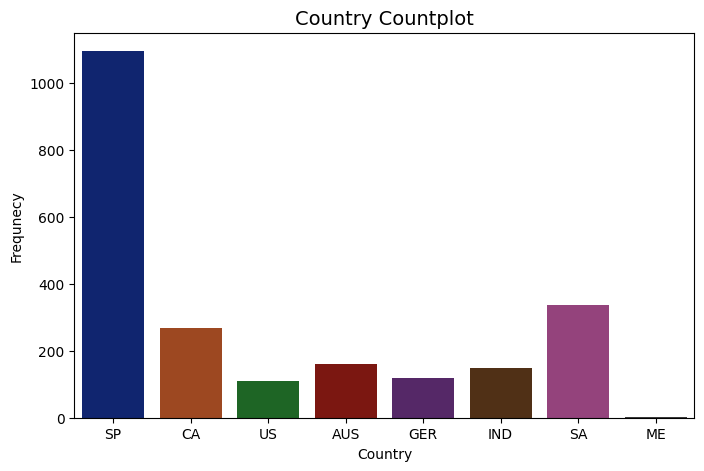

In [30]:
countplot('Country')

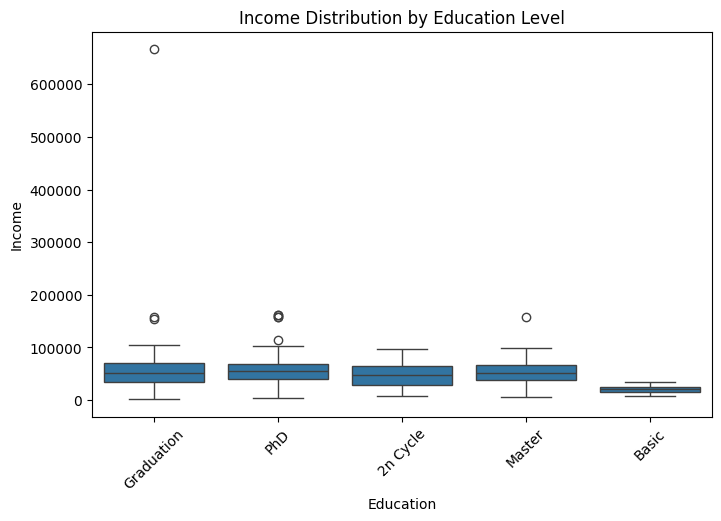

In [31]:
# Bi-Variate Analysis By Boxolot
plt.figure(figsize=(8 ,5))
sns.boxplot(x='Education', y='Income', data=data)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.show()

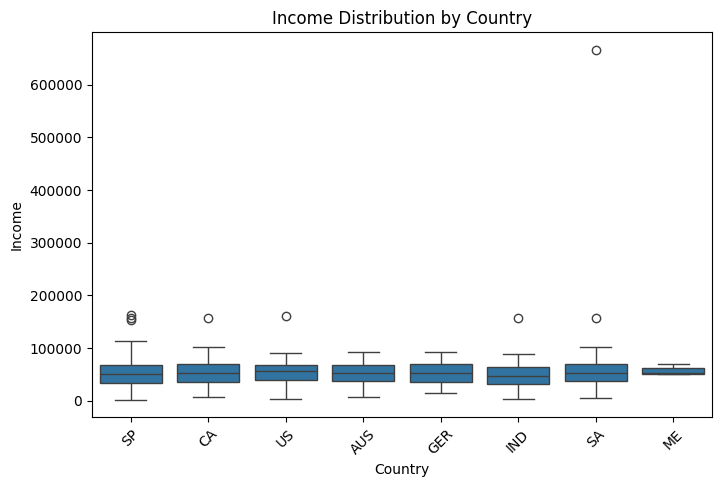

In [32]:
plt.figure(figsize=(8 ,5))
sns.boxplot(x='Country', y='Income', data=data)
plt.xticks(rotation=45)
plt.title('Income Distribution by Country')
plt.show()

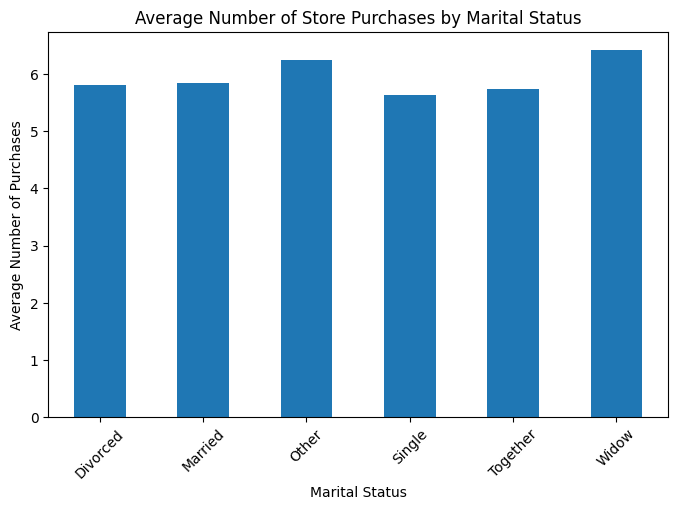

In [33]:
#Average Number of Store Purchases by Marital Status

plt.figure(figsize=(8, 5))
data.groupby('Marital_Status')['NumStorePurchases'].mean().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Purchases')
plt.title('Average Number of Store Purchases by Marital Status')
plt.xticks(rotation=45)
plt.show()

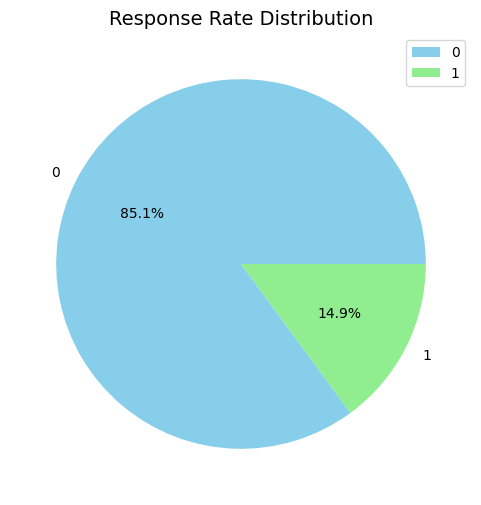

In [34]:
#Response Percentange
plt.figure(figsize=(6, 6))
data['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Response Rate Distribution', fontsize=14)
plt.ylabel('')
plt.legend()
plt.show()

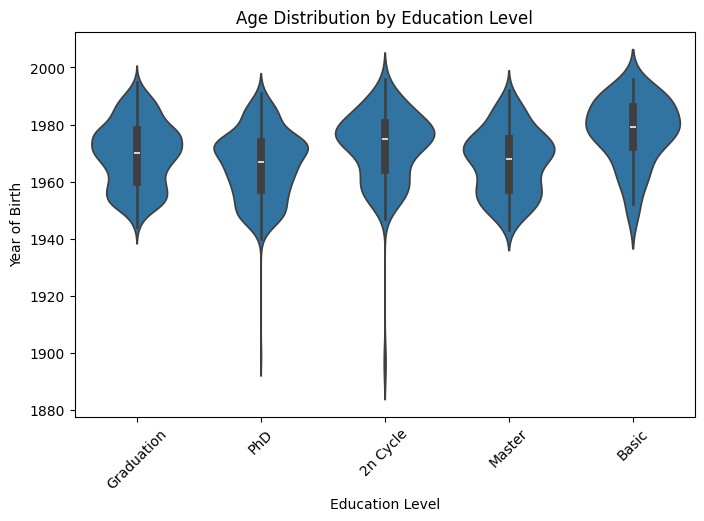

In [35]:
#Age Distribution By Education
plt.figure(figsize=(8, 5))
sns.violinplot(x='Education', y='Year_Birth', data=data)
plt.xlabel('Education Level')
plt.ylabel('Year of Birth')
plt.title('Age Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

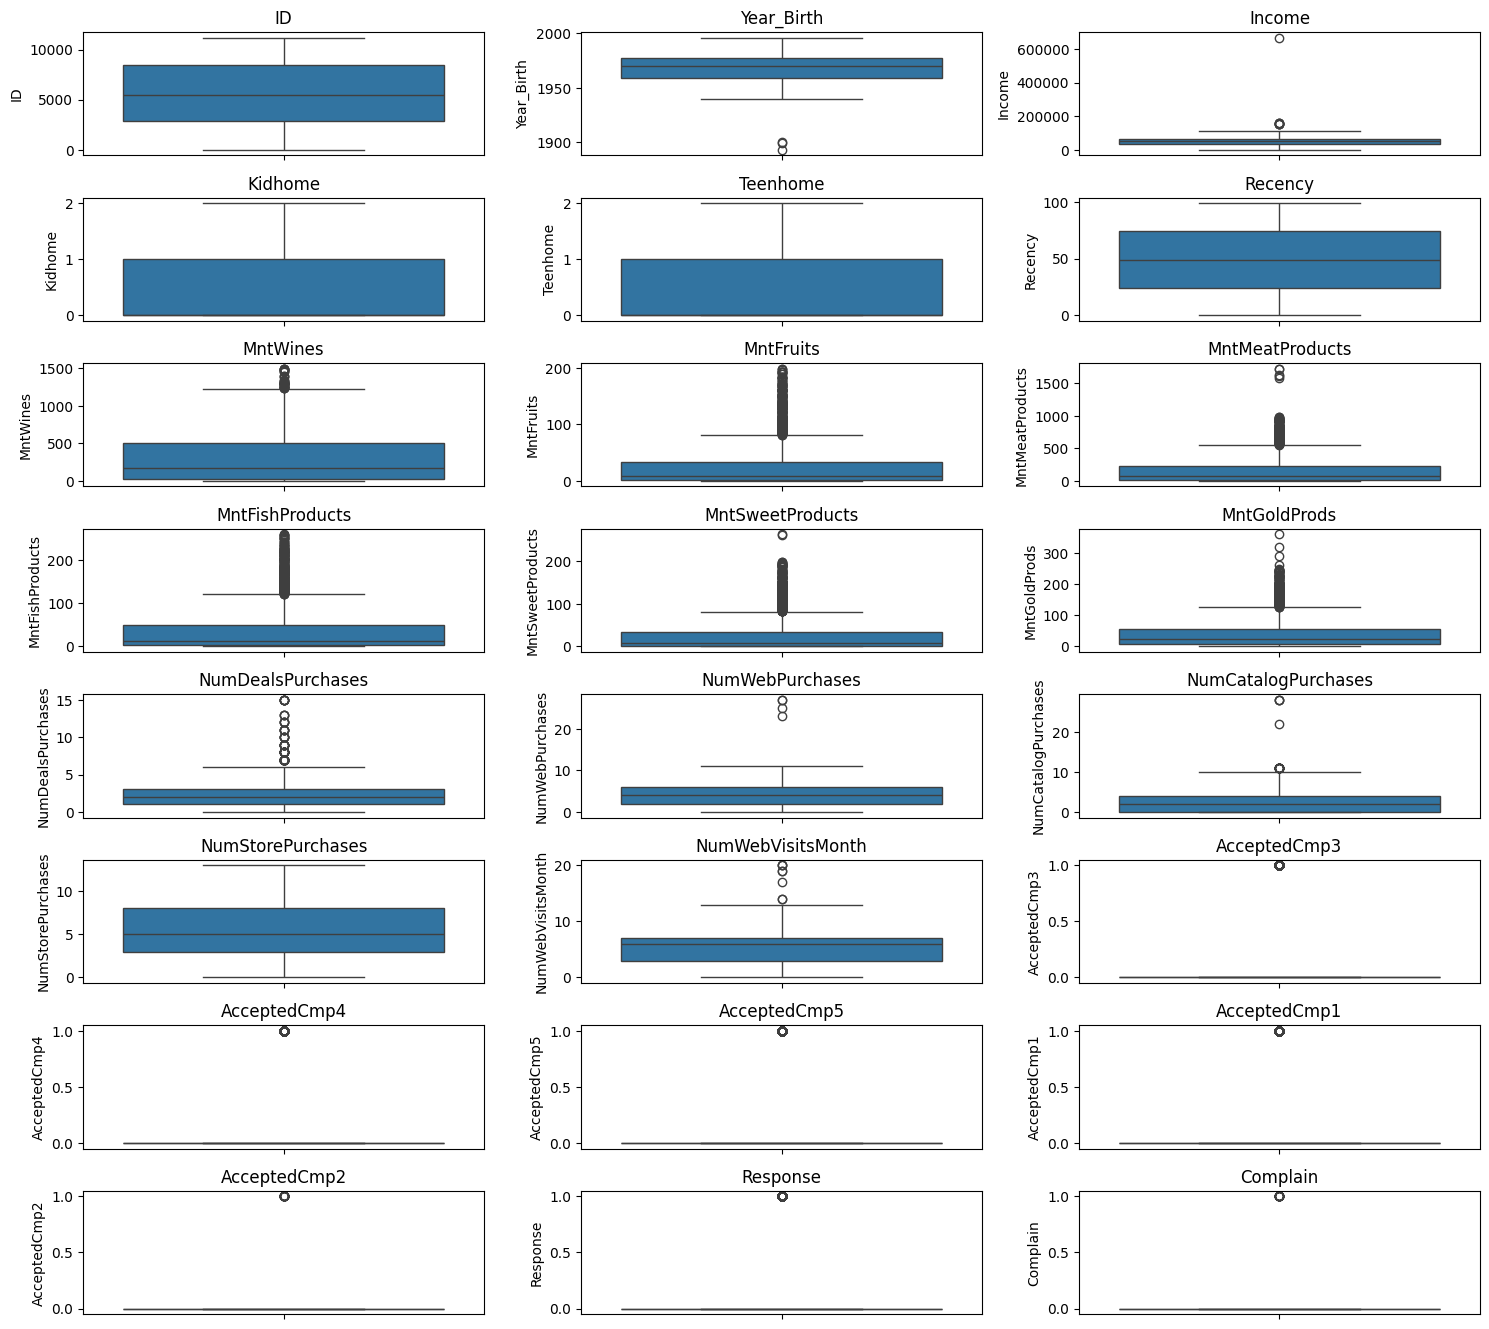

In [36]:
#Boxplot of Numeric Features
# List of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for numeric columns
plt.figure(figsize=(15, 15))

# Creating subplots for each numeric feature
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [37]:
#Scatter Plot
# Function to plot scatter plots for specific pairs of features
def scatter_plot(data, x_feature, y_feature):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=x_feature, y=y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()

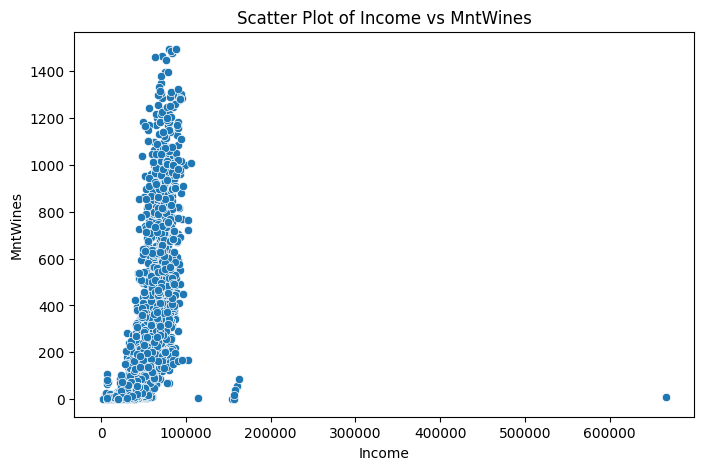

In [38]:
scatter_plot(data, 'Income', 'MntWines')

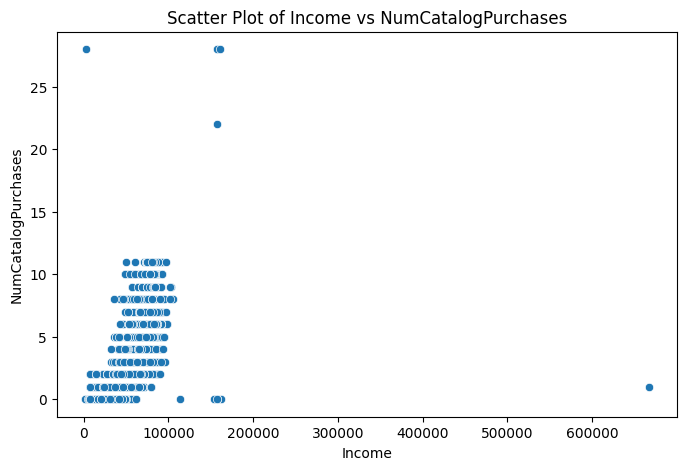

In [39]:
scatter_plot(data, 'Income', 'NumCatalogPurchases')

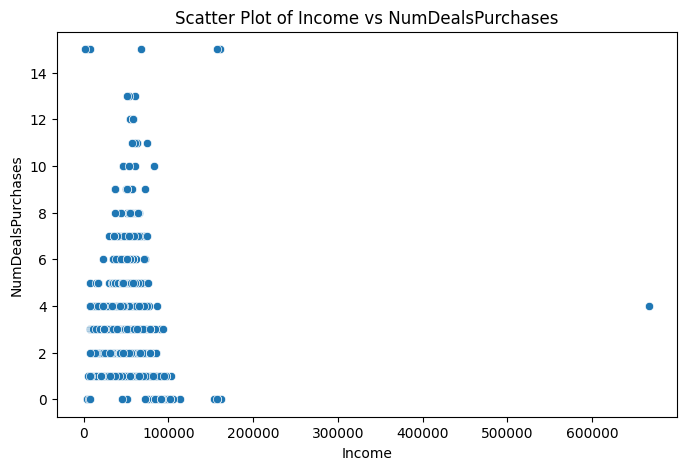

In [40]:
scatter_plot(data, 'Income', 'NumDealsPurchases')

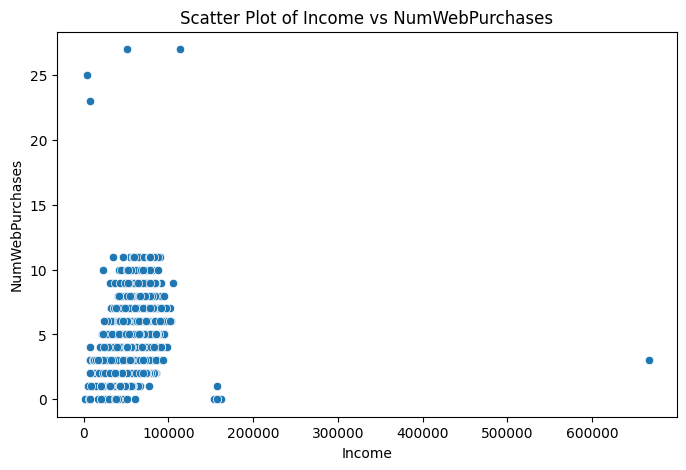

In [41]:
scatter_plot(data, 'Income', 'NumWebPurchases')

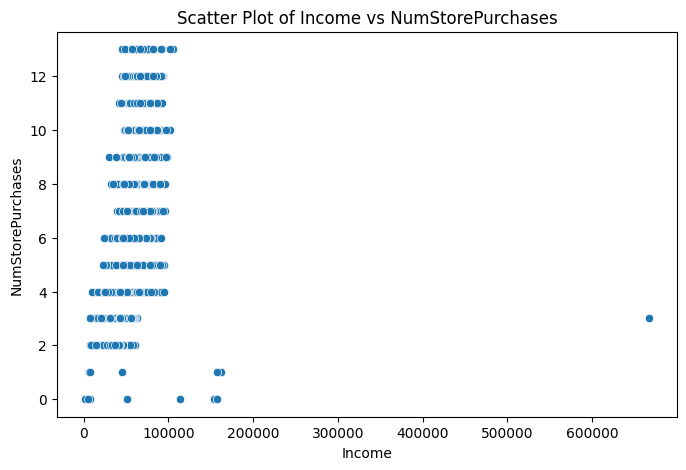

In [42]:
scatter_plot(data, 'Income', 'NumStorePurchases')

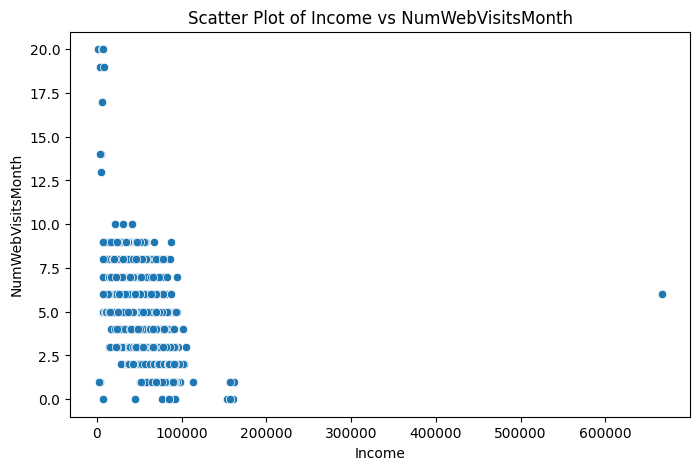

In [43]:
scatter_plot(data, 'Income', 'NumWebVisitsMonth')

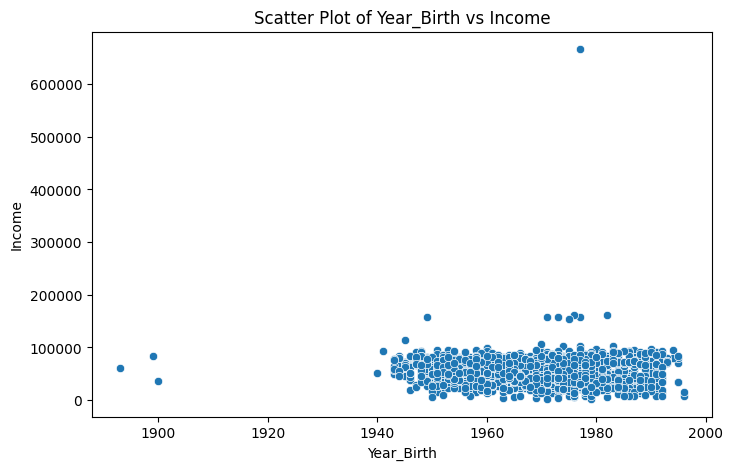

In [44]:
scatter_plot(data, 'Year_Birth', 'Income')

<Axes: >

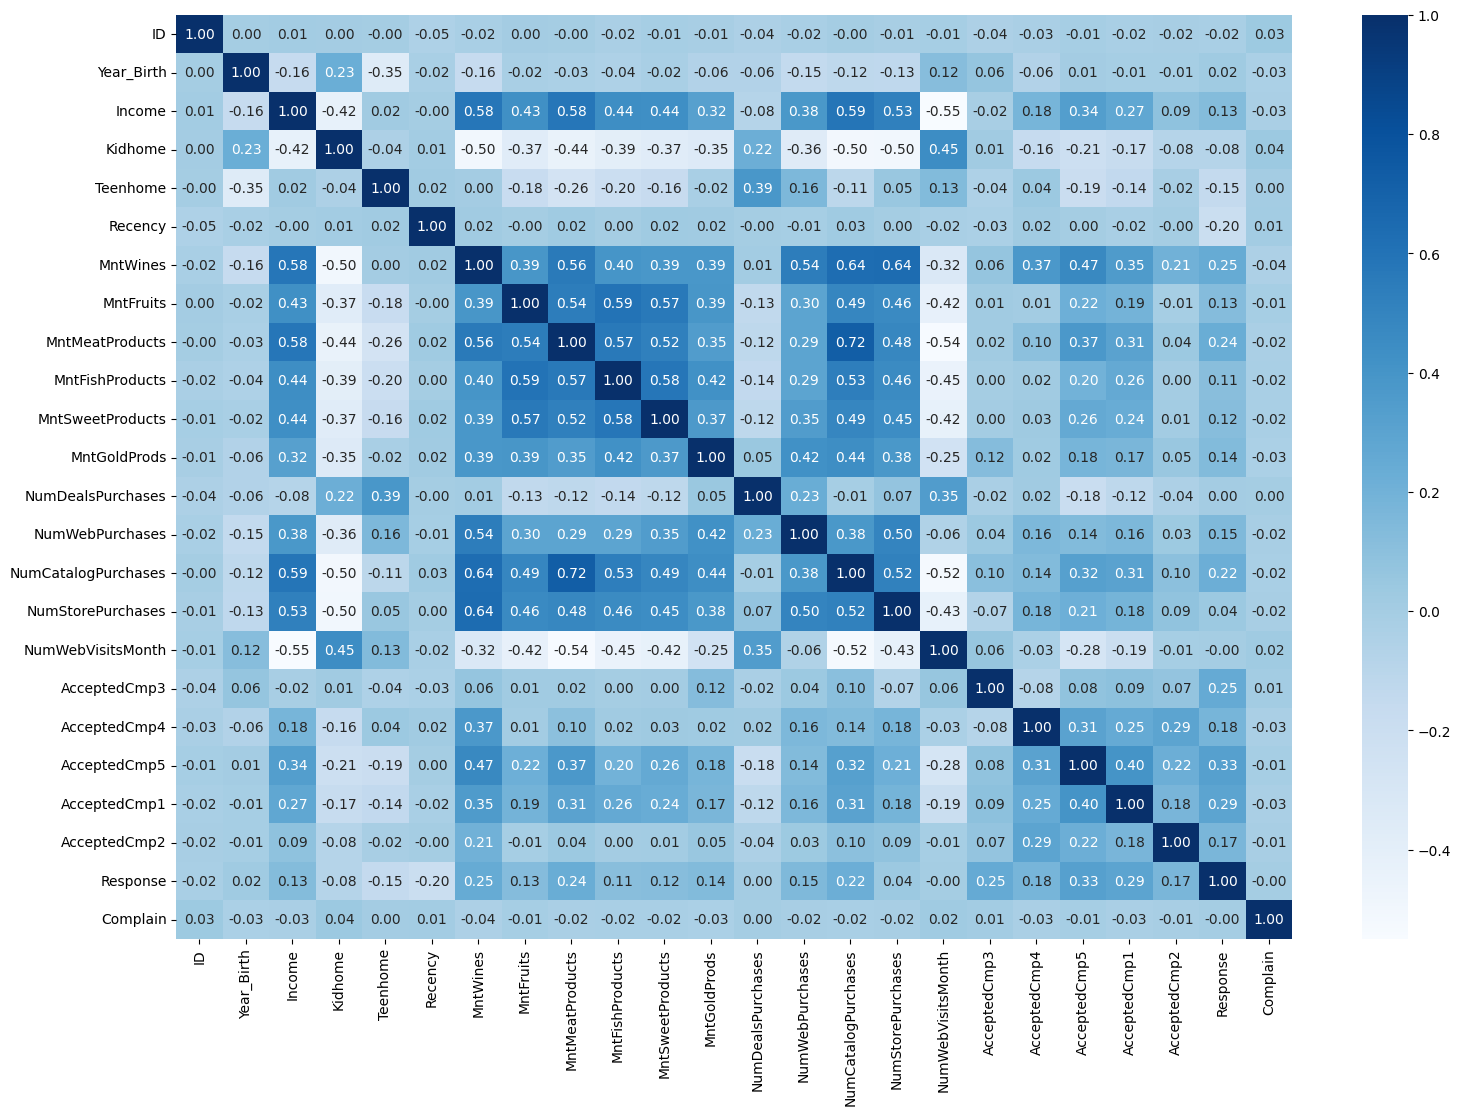

In [45]:
#Correlation Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues')

In [ ]:
# Create variables
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Age'] = 2024 - data['Year_Birth']
data['Total_Spending'] = data['MntWines'] + data['MntFruits'] + data['MntGoldProds']

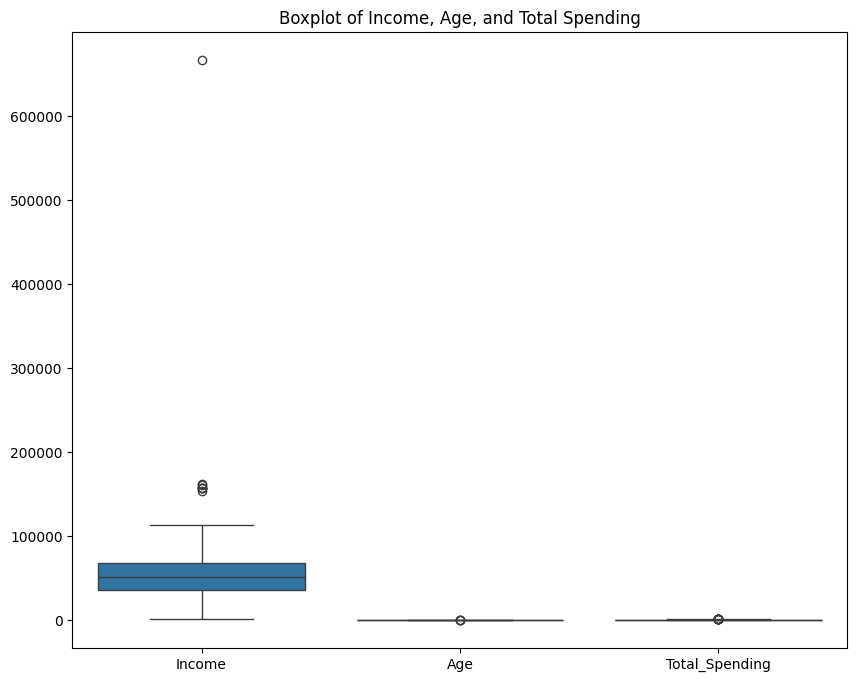

In [ ]:
#Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.
# Visualize distributions and outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[['Income', 'Age', 'Total_Spending']])
plt.title('Boxplot of Income, Age, and Total Spending')
plt.show()

In [ ]:
#Outliner_treatment
def outlier_treatment(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound,
                                 np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column]))
    return dataframe

data = outlier_treatment(data, 'Income')
data = outlier_treatment(data, 'Age')
data = outlier_treatment(data, 'Total_Spending')

In [ ]:
#Use ordinal encoding and one hot encoding according to different types of categorical variables.
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

# Ordinal encoding for categorical variables
ordinal_mapping = {
    'AcceptedCmp1': {'No': 0, 'Yes': 1},
    'AcceptedCmp2': {'No': 0, 'Yes': 1},
    'AcceptedCmp3': {'No': 0, 'Yes': 1},
    'AcceptedCmp4': {'No': 0, 'Yes': 1},
    'AcceptedCmp5': {'No': 0, 'Yes': 1},
    'Response': {'No': 0, 'Yes': 1}
}

data_encoded.replace(ordinal_mapping, inplace=True)

print(data_encoded.dtypes)


ID                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                 object
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Response                     int64
Complain                     int64
Country                     object
Total_Children               int64
Age                        float64
Total_Spending      

In [ ]:
#We can see Date and Country columns are object we need to perform encoding on Date and Country
# Convert 'Dt_Customer' to datetime format
data_encoded['Dt_Customer'] = pd.to_datetime(data_encoded['Dt_Customer'])

# Calculate the number of days since the customer joined
data_encoded['Days_Since_Joined'] = (pd.to_datetime('2024-05-04') - data_encoded['Dt_Customer']).dt.days

# Exclude 'Dt_Customer' and 'Country' columns from correlation analysis
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns.drop(['Days_Since_Joined'])

# One-hot encoding for 'Country' column
data_encoded = pd.get_dummies(data_encoded, columns=['Country'])

print(data_encoded.dtypes)

ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Response                          

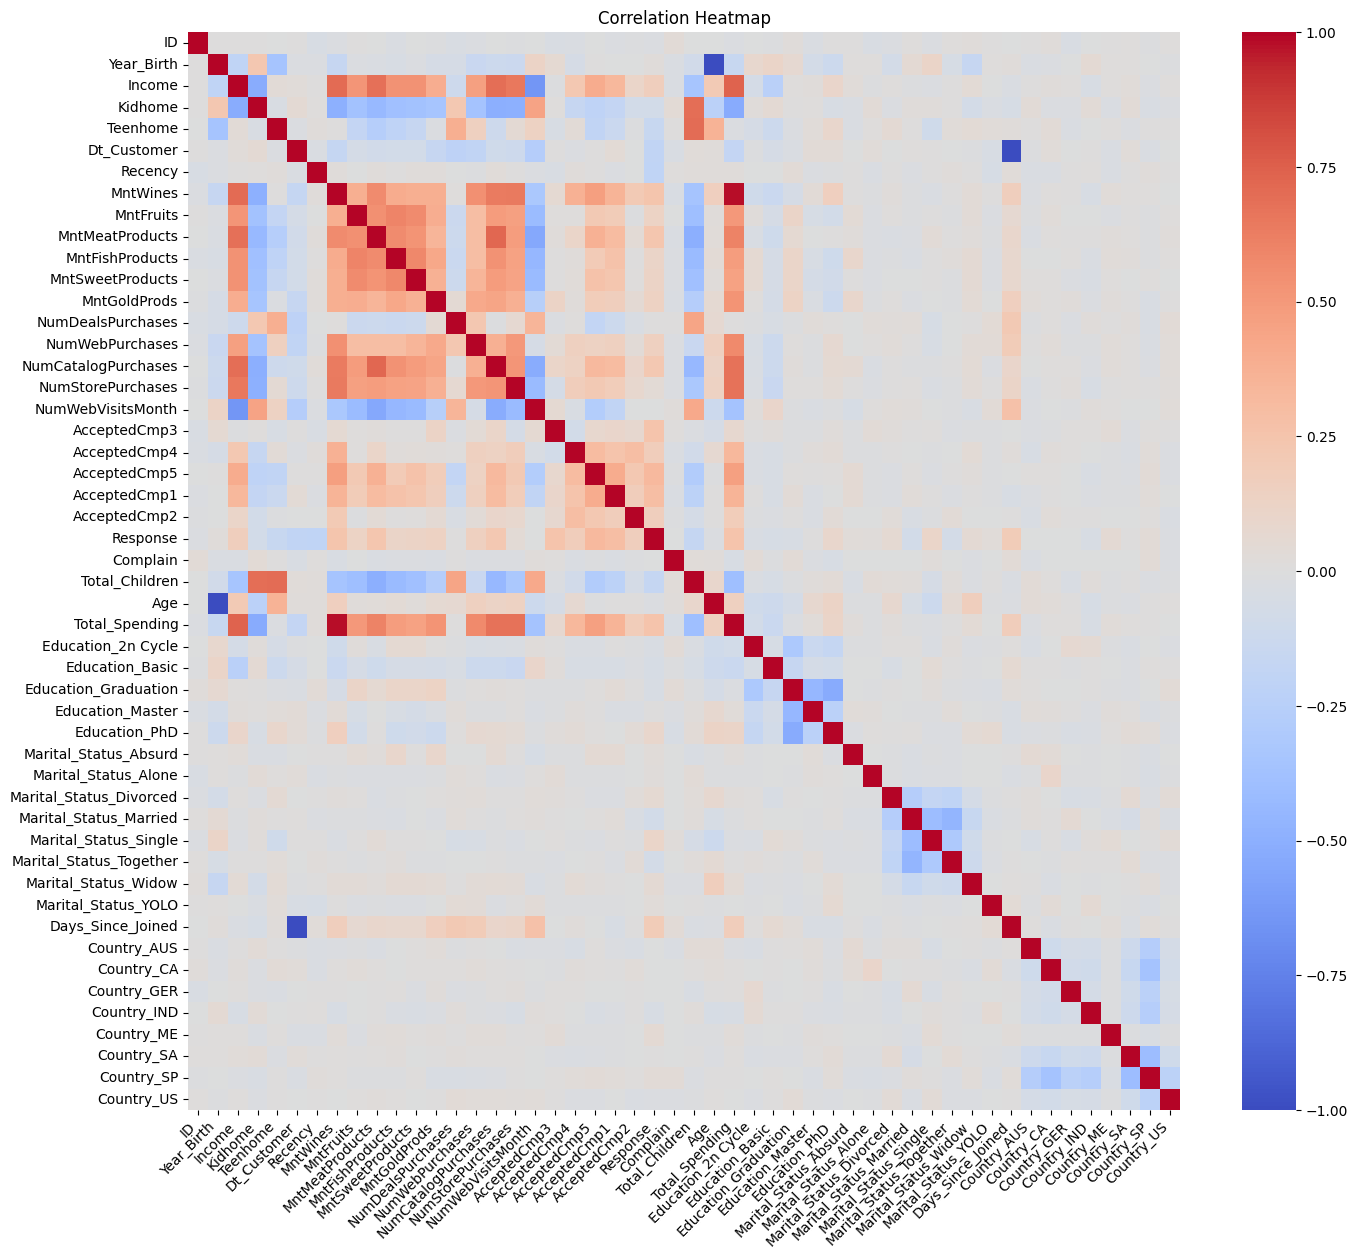

In [ ]:
#We can see all the columns are good for heatmap correlation
#Create a heatmap to showcase the correlation between different pairs of variables

# Increase font size of annotations
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(data_encoded.corr(), cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Rotate x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.title('Correlation Heatmap')
plt.show()

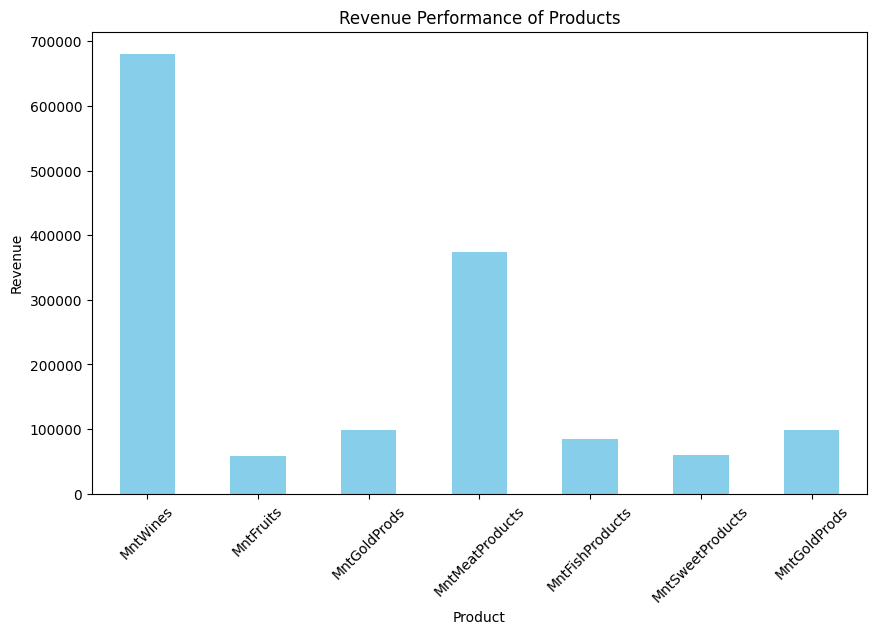

In [ ]:
#Visualize revenue performance of products

# Select all product columns
product_columns = ['MntWines', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total revenue for each product
product_revenue = data[product_columns].sum()

# Plot revenue performance of all products
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue Performance of Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

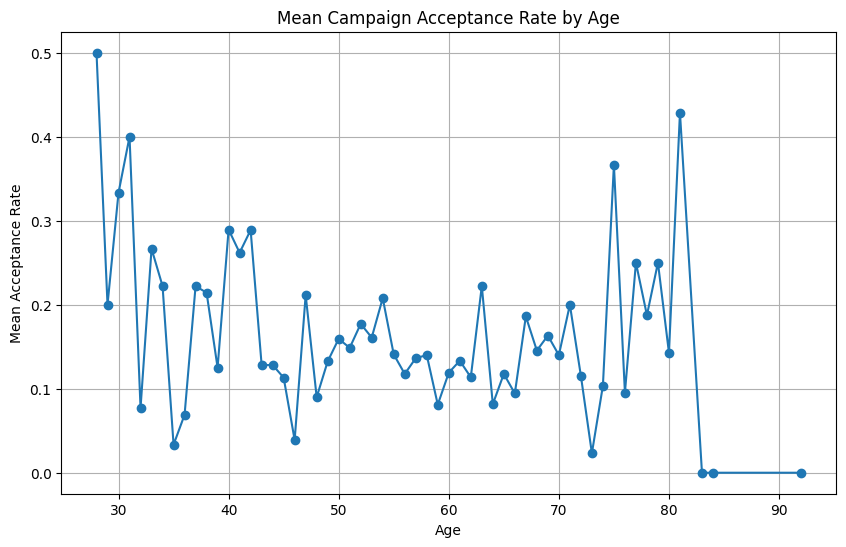

In [ ]:
#Pattern between age of customers and last campaign acceptance rate

# Calculate the mean response rate for each age
age_response_mean = data.groupby('Age')['Response'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(age_response_mean['Age'], age_response_mean['Response'], marker='o', linestyle='-')
plt.title('Mean Campaign Acceptance Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mean Acceptance Rate')
plt.grid(True)
plt.show()

In [ ]:
#Country with greatest number of customers who accepted the last campaign

country_campaign = data[data['Response'] == 1]['Country'].value_counts().nlargest(1)
print("Country with the greatest number of customers who accepted the last campaign:", country_campaign.index[0])

Country with the greatest number of customers who accepted the last campaign: SP


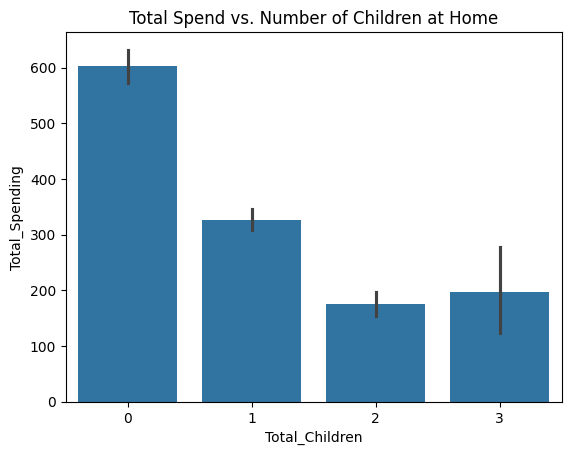

In [ ]:
#Pattern in number of children at home and total spend

sns.barplot(x='Total_Children', y='Total_Spending', data=data)
plt.title('Total Spend vs. Number of Children at Home')
plt.show()

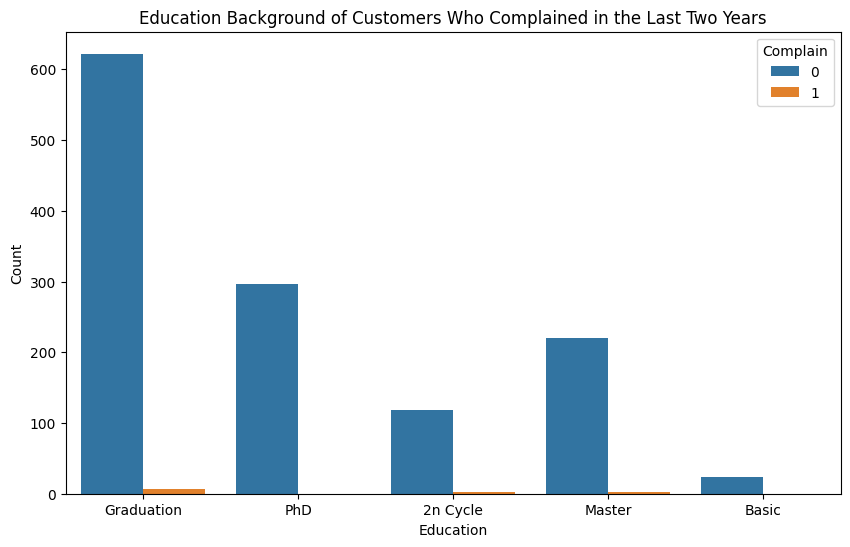

In [ ]:
#Education background of customers who complained in the last 2 years

# Filter data for customers who complained in the last two years
complained_last_two_years = data[data['Dt_Customer'] >= '2022-01-01']

# Plot education background of customers who complained in the last two years
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Complain', data=complained_last_two_years)
plt.title('Education Background of Customers Who Complained in the Last Two Years')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()